In [4]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import numpy as np
import tushare as ts
import datetime


In [5]:
today = datetime.date.today()
today_display = str(today)
month = today_display[:7]
movie = ts.month_boxoffice(month)
top_three = movie.head(3)
top_three

,Irank,MovieName,WomIndex,avgboxoffice,avgshowcount,box_pro,boxoffice,days,releaseTime
0,1,蜘蛛侠：英雄归来,,35,19,35.5,65346,23,2017-09-08
1,2,敦刻尔克,,34,12,17.8,32747,30,2017-09-01
2,3,猩球崛起3：终极之战,,35,36,15.6,28719,16,2017-09-15


In [6]:
month


'2017-09'

In [7]:
today_display

'2017-09-17'

In [26]:
movie_names = list(top_three['MovieName'])

#用于保存获取到的电影的票房信息
boxoffice_record = {}
for i in range(3):
    boxoffice_record[movie_names[i]] = []
boxoffice_record

{'敦刻尔克': [], '猩球崛起3：终极之战': [], '蜘蛛侠：英雄归来': []}

In [27]:
date_record = []
for i in range(7):
    current = str(today + datetime.timedelta(days=i) - datetime.timedelta(days=7))
    print(current)
    date_record.append(current)
    single_day_boxoffice = ts.day_boxoffice(current)
    for j in range(len(movie_names)):
        movie_boxoffice = boxoffice_record[movie_names[j]]
        top3_movie = single_day_boxoffice[single_day_boxoffice['MovieName'] == movie_names[j]]
        if top3_movie.empty:
            movie_boxoffice.append(0)
        else:
            movie_boxoffice.append(float(top3_movie['BoxOffice']))
days = np.arange(7)
boxoffices = np.array((boxoffice_record[movie_names[0]], boxoffice_record[movie_names[1]], 
boxoffice_record[movie_names[2]]))
boxoffices

2017-09-10
2017-09-11
2017-09-12
2017-09-13
2017-09-14
2017-09-15
2017-09-16


array([[  4146.,   3379.,   2807.,   2351.,   2034.,   4445.,   1980.],
       [   489.,    464.,    424.,    398.,    156.,    308.,    163.],
       [     0.,      0.,      0.,    930.,  12290.,  15553.,   5735.]])

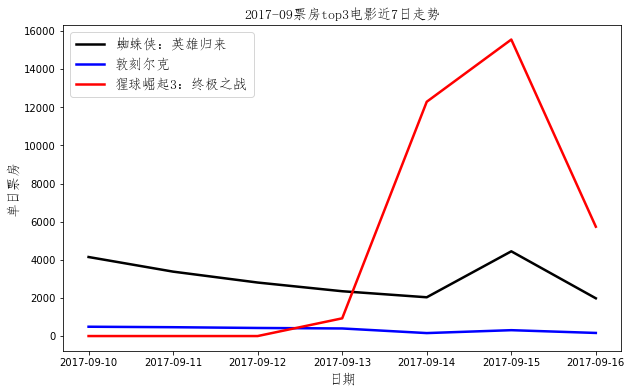

In [34]:
font = FontProperties(fname="simfang.ttf", size=14)
fig = plt.figure(figsize=(10, 6))
plt.plot(days, boxoffices[0], color='black', linestyle='-', linewidth=2.5, label=movie_names[0])
plt.plot(days, boxoffices[1], color='blue', linestyle='-', linewidth=2.5, label=movie_names[1])
plt.plot(days, boxoffices[2], color='red', linestyle='-', linewidth=2.5, label=movie_names[2])
plt.legend(loc='upper left', prop=font)
plt.title('%s票房top3电影近7日走势' % month, fontproperties=font)
plt.xlabel(u'日期', fontproperties=font)
plt.ylabel(u'单日票房', fontproperties=font)
plt.xticks(days, date_record)
plt.show()